In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 15

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

Metal device set to: Apple M2


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
Total params: 1,235
Trainable params: 1,235
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=40, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2023-05-12 12:21:08.011409: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


55/55 [==============================] - ETA: 0s - loss: 2.7548 - accuracy: 0.0967
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 1s 9ms/step - loss: 2.7548 - accuracy: 0.0967 - val_loss: 2.5956 - val_accuracy: 0.1569
Epoch 2/1000
55/55 [==============================] - ETA: 0s - loss: 2.5620 - accuracy: 0.1647
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 2.5620 - accuracy: 0.1647 - val_loss: 2.4165 - val_accuracy: 0.2135
Epoch 3/1000
53/55 [===========================>..] - ETA: 0s - loss: 2.3851 - accuracy: 0.1931
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 7ms/step - loss: 2.3840 - accuracy: 0.1935 - val_loss: 2.2030 - val_accuracy: 0.2943
Epoch 4/1000
55/55 [==============================] - ETA: 0s - loss: 2.2164 - accuracy: 0.2239
Epoch 4: savin

45/55 [=======================>......] - ETA: 0s - loss: 1.3711 - accuracy: 0.4969
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.3664 - accuracy: 0.5006 - val_loss: 0.9885 - val_accuracy: 0.7498
Epoch 29/1000
46/55 [========================>.....] - ETA: 0s - loss: 1.3611 - accuracy: 0.5085
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.3639 - accuracy: 0.5078 - val_loss: 0.9742 - val_accuracy: 0.7541
Epoch 30/1000
52/55 [===========================>..] - ETA: 0s - loss: 1.3436 - accuracy: 0.5111
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 7ms/step - loss: 1.3444 - accuracy: 0.5104 - val_loss: 0.9616 - val_accuracy: 0.7662
Epoch 31/1000
52/55 [===========================>..] - ETA: 0s - loss: 1.3344 - accuracy: 0.5162
Epoch 31

45/55 [=======================>......] - ETA: 0s - loss: 1.1667 - accuracy: 0.5785
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.1531 - accuracy: 0.5836 - val_loss: 0.7300 - val_accuracy: 0.8224
Epoch 56/1000
44/55 [=======================>......] - ETA: 0s - loss: 1.1699 - accuracy: 0.5792
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.1640 - accuracy: 0.5803 - val_loss: 0.7395 - val_accuracy: 0.8181
Epoch 57/1000
45/55 [=======================>......] - ETA: 0s - loss: 1.1653 - accuracy: 0.5743
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.1668 - accuracy: 0.5736 - val_loss: 0.7299 - val_accuracy: 0.8284
Epoch 58/1000
46/55 [========================>.....] - ETA: 0s - loss: 1.1412 - accuracy: 0.5909
Epoch 58

55/55 [==============================] - ETA: 0s - loss: 1.0486 - accuracy: 0.6160
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.0486 - accuracy: 0.6160 - val_loss: 0.6253 - val_accuracy: 0.8850
Epoch 83/1000
55/55 [==============================] - ETA: 0s - loss: 1.0533 - accuracy: 0.6339
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.0533 - accuracy: 0.6339 - val_loss: 0.6203 - val_accuracy: 0.8876
Epoch 84/1000
45/55 [=======================>......] - ETA: 0s - loss: 1.0418 - accuracy: 0.6280
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.0460 - accuracy: 0.6246 - val_loss: 0.6235 - val_accuracy: 0.8876
Epoch 85/1000
45/55 [=======================>......] - ETA: 0s - loss: 1.0567 - accuracy: 0.6220
Epoch 85

48/55 [=========================>....] - ETA: 0s - loss: 0.9775 - accuracy: 0.6465
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9829 - accuracy: 0.6442 - val_loss: 0.5705 - val_accuracy: 0.8924
Epoch 110/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.9843 - accuracy: 0.6444
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9935 - accuracy: 0.6390 - val_loss: 0.5641 - val_accuracy: 0.8950
Epoch 111/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.9908 - accuracy: 0.6424
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9896 - accuracy: 0.6419 - val_loss: 0.5575 - val_accuracy: 0.8863
Epoch 112/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.9772 - accuracy: 0.6448
Ep

Epoch 136/1000
54/55 [============================>.] - ETA: 0s - loss: 0.9512 - accuracy: 0.6549
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9519 - accuracy: 0.6548 - val_loss: 0.5360 - val_accuracy: 0.8825
Epoch 137/1000
46/55 [========================>.....] - ETA: 0s - loss: 0.9634 - accuracy: 0.6586
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9549 - accuracy: 0.6594 - val_loss: 0.5488 - val_accuracy: 0.8850
Epoch 138/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.9525 - accuracy: 0.6516
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9548 - accuracy: 0.6477 - val_loss: 0.5247 - val_accuracy: 0.8946
Epoch 139/1000
55/55 [==============================] - ETA: 0s - loss: 0.9625 - accu

Epoch 163/1000
47/55 [========================>.....] - ETA: 0s - loss: 0.9224 - accuracy: 0.6699
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9207 - accuracy: 0.6696 - val_loss: 0.4949 - val_accuracy: 0.9080
Epoch 164/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.9272 - accuracy: 0.6696
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9298 - accuracy: 0.6679 - val_loss: 0.5073 - val_accuracy: 0.8993
Epoch 165/1000
47/55 [========================>.....] - ETA: 0s - loss: 0.9388 - accuracy: 0.6637
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9464 - accuracy: 0.6617 - val_loss: 0.5067 - val_accuracy: 0.9058
Epoch 166/1000
46/55 [========================>.....] - ETA: 0s - loss: 0.9297 - accu

Epoch 190/1000
46/55 [========================>.....] - ETA: 0s - loss: 0.9258 - accuracy: 0.6663
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9259 - accuracy: 0.6631 - val_loss: 0.5040 - val_accuracy: 0.9002
Epoch 191/1000
47/55 [========================>.....] - ETA: 0s - loss: 0.9152 - accuracy: 0.6725
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9196 - accuracy: 0.6719 - val_loss: 0.4961 - val_accuracy: 0.9049
Epoch 192/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.9156 - accuracy: 0.6727
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9134 - accuracy: 0.6739 - val_loss: 0.4916 - val_accuracy: 0.9049
Epoch 193/1000
47/55 [========================>.....] - ETA: 0s - loss: 0.8952 - accu

Epoch 217/1000
46/55 [========================>.....] - ETA: 0s - loss: 0.8991 - accuracy: 0.6785
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.9041 - accuracy: 0.6791 - val_loss: 0.4990 - val_accuracy: 0.9010
Epoch 218/1000
47/55 [========================>.....] - ETA: 0s - loss: 0.8936 - accuracy: 0.6858
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.8891 - accuracy: 0.6854 - val_loss: 0.4808 - val_accuracy: 0.9062
Epoch 219/1000
48/55 [=========================>....] - ETA: 0s - loss: 0.9023 - accuracy: 0.6771
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 0.8940 - accuracy: 0.6798 - val_loss: 0.4944 - val_accuracy: 0.9015
Epoch 220/1000
45/55 [=======================>......] - ETA: 0s - loss: 0.8823 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.9162


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 49ms/step
[3.0915800e-01 2.0236298e-03 2.4595083e-04 9.8144425e-05 3.6246676e-03
 3.2781709e-02 6.3355708e-01 1.9884317e-03 9.7453324e-03 2.7024671e-03
 3.8386702e-03 7.1688197e-07 1.5827314e-09 2.3519398e-04 1.5541726e-11]
6


# Confusion matrix

73/73 [==============================] - 0s 1ms/step


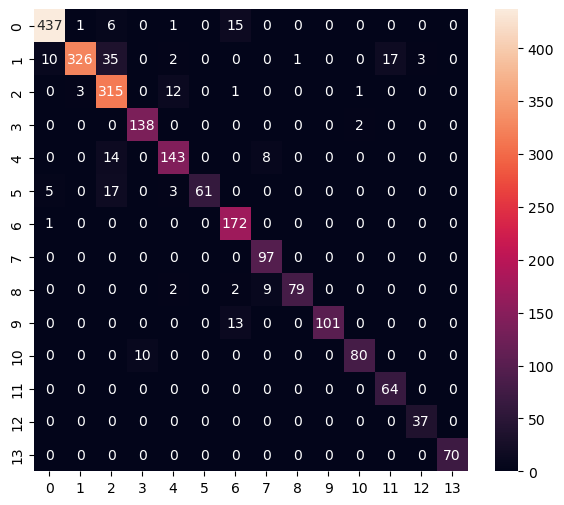

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       460
           1       0.99      0.83      0.90       394
           2       0.81      0.95      0.88       332
           3       0.93      0.99      0.96       140
           4       0.88      0.87      0.87       165
           5       1.00      0.71      0.83        86
           6       0.85      0.99      0.91       173
           7       0.85      1.00      0.92        97
           8       0.99      0.86      0.92        92
           9       1.00      0.89      0.94       114
          10       0.96      0.89      0.92        90
          11       0.79      1.00      0.88        64
          12       0.93      1.00      0.96        37
          13       1.00      1.00      1.00        70

    accuracy                           0.92      2314
   macro avg       0.92      0.92      0.92      2314
weighted avg       0.92      0.92      0.92      2314



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/dc/8_glt6jn2csfcxfrzfwszq_r0000gn/T/tmps1xl0xd2/assets


2023-05-12 12:22:32.462746: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-12 12:22:32.462761: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


7028

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 89 µs, sys: 95 µs, total: 184 µs
Wall time: 122 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.0915791e-01 2.0236303e-03 2.4595071e-04 9.8144454e-05 3.6246662e-03
 3.2781705e-02 6.3355714e-01 1.9884331e-03 9.7453445e-03 2.7024718e-03
 3.8386709e-03 7.1688243e-07 1.5827254e-09 2.3519408e-04 1.5541729e-11]
6
